In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Setup

In [13]:
mer = pd.ExcelFile('dataset/2. MER PointTransaction 2023_RetailsResellers_Final.xlsx')
mer_sheet1 = pd.read_excel(mer, 'MER Transaction')
mer_sheet2 = pd.read_excel(mer, 'Point Per Litre')

In [14]:
print(mer_sheet1.shape)
mer_sheet1.head()

(9429, 8)


Invoicedate Distributor             GroupId      Type  Provincename   MatNo  \
0  2023-02-14           A  ERW_AI8N2021070006   Retails  Pathum Thani  123150   
1  2023-04-20           D  ERW_DBG72020110082  Reseller      Songkhla  124213   
2  2023-10-19           D  ERW_DBG72020110082  Reseller      Songkhla  124216   
3  2023-07-25           D  ERW_DBG72020110082  Reseller      Songkhla  124216   
4  2023-10-12           D  ERW_DBG72020110082  Reseller      Songkhla  124216   

                      Material Name  New_Volume(L)  
0  MOBIL MULTIPURPOSE ATF, 208LT DR           7168  
1            MOBIL ATF 220  D 208LT            912  
2             MOBIL ATF 220 P1/20LT           7340  
3             MOBIL ATF 220 P1/20LT           1640  
4             MOBIL ATF 220 P1/20LT           7080

In [15]:
print(mer_sheet2.shape)
mer_sheet2.head()

(145, 2)


MatNo  Points
0  144673      10
1  140521      10
2  144473      10
3  145832      10
4  140418      10

In [16]:
mer = pd.merge(mer_sheet1, mer_sheet2, on='MatNo', how='left')
print(mer.shape)
mer.head()

(9429, 9)


Invoicedate Distributor             GroupId      Type  Provincename   MatNo  \
0  2023-02-14           A  ERW_AI8N2021070006   Retails  Pathum Thani  123150   
1  2023-04-20           D  ERW_DBG72020110082  Reseller      Songkhla  124213   
2  2023-10-19           D  ERW_DBG72020110082  Reseller      Songkhla  124216   
3  2023-07-25           D  ERW_DBG72020110082  Reseller      Songkhla  124216   
4  2023-10-12           D  ERW_DBG72020110082  Reseller      Songkhla  124216   

                      Material Name  New_Volume(L)  Points  
0  MOBIL MULTIPURPOSE ATF, 208LT DR           7168       1  
1            MOBIL ATF 220  D 208LT            912       1  
2             MOBIL ATF 220 P1/20LT           7340       1  
3             MOBIL ATF 220 P1/20LT           1640       1  
4             MOBIL ATF 220 P1/20LT           7080       1

In [17]:
mer[ mer['GroupId'] == 'ERW_DBG72020110082' ].sort_values(['Invoicedate', 'Material Name'])

Invoicedate Distributor             GroupId      Type Provincename  \
1908  2023-01-16           D  ERW_DBG72020110082  Reseller     Songkhla   
4571  2023-01-27           D  ERW_DBG72020110082  Reseller     Songkhla   
1909  2023-01-27           D  ERW_DBG72020110082  Reseller     Songkhla   
1851  2023-01-27           D  ERW_DBG72020110082  Reseller     Songkhla   
4876  2023-01-27           D  ERW_DBG72020110082  Reseller     Songkhla   
...          ...         ...                 ...       ...          ...   
7181  2023-12-23           D  ERW_DBG72020110082  Reseller     Songkhla   
277   2023-12-23           D  ERW_DBG72020110082  Reseller     Songkhla   
287   2023-12-23           D  ERW_DBG72020110082  Reseller     Songkhla   
4278  2023-12-23           D  ERW_DBG72020110082  Reseller     Songkhla   
7750  2023-12-23           D  ERW_DBG72020110082  Reseller     Songkhla   

       MatNo                                      Material Name  \
1908  140521                          MOBIL 1 0W-40 CTN 4X4L:SG   
4571  143877           M SUP AIO PROTECTION TBS5W30 CTN 4X7L:TH   
1909  140521                          MOBIL 1 0W-40 CTN 4X4L:SG   
1851  140418                      MOBIL 1 TBD 5W-40 CTN 4X6L:TH   
4876  143899                MOBIL ATF 220 SYN TECH CTN 12X1L:TH   
...      ...                                                ...   
7181  145500  MOBIL DELVAC Modern 15W-40 Super Defense PAIL1...   
277   134728                MOBIL DELVAC SUPER 20W50, 18LT PAIL   
287   134728                MOBIL DELVAC SUPER 20W50, 18LT PAIL   
4278  143874            MOBIL SUPER 3000 TBS 5W-30 CTN 12X1L:TH   
7750  145570  MOBIL SUPER FRICTION FIGHTER 10W-40 CTN 4X4+1L:TH   

      New_Volume(L)  Points  
1908           2240      10  
4571           2632       1  
1909           7872      10  
1851           2028      10  
4876           1044       1  
...             ...     ...  
7181           3580       2  
277            5652       1  
287            5454       1  
4278           1188       1  
7750           4440       2  

[112 rows x 9 columns]

Handle null/ missing values

In [18]:
mer.isnull().sum()

Invoicedate      0
Distributor      0
GroupId          0
Type             0
Provincename     0
MatNo            0
Material Name    0
New_Volume(L)    0
Points           0
dtype: int64

In [19]:
# Fix Typos
mat_default = mer_sheet1.sort_values(['MatNo', 'Material Name']).groupby('MatNo').head(1)\
                        .loc[:, ['MatNo', 'Material Name']].set_index('MatNo')
mat_default['Material Name'] = mat_default['Material Name'].str.replace('โมบิล', 'MOBIL')
mat_default['Material Name'] = mat_default['Material Name'].str.replace('เดลแวค', 'DELVAC')
mat_default['Material Name'] = mat_default['Material Name'].str.replace('สเปเชียล', 'SPECIAL')
mat_default.loc[ mat_default.index == 140563, 'Material Name'] = 'MOBIL DELVAC 1 GEAR OIL 75W90, 1/35LB'

mat_default.shape
# with pd.option_context('display.max_rows', None):
#     display(mat_default)

(145, 1)

In [20]:
for i in mer['MatNo'].unique():
    mer.loc[mer['MatNo'] == i, 'Material Name'] = mat_default.loc[i, 'Material Name']
            
mer[ ['MatNo', 'Material Name']].drop_duplicates().shape

(145, 2)

In [21]:
mer.dropna(inplace=True)
mer.isnull().any()

Invoicedate      False
Distributor      False
GroupId          False
Type             False
Provincename     False
MatNo            False
Material Name    False
New_Volume(L)    False
Points           False
dtype: bool

### EDA
Points per group

In [22]:
mer['Provincename'] = mer['Provincename'].replace('N\A', np.nan)
mer[mer['Provincename'].isnull()].head()

Invoicedate Distributor             GroupId     Type Provincename  \
1705  2023-11-03           A  ERW_A7QF2022060002  Retails          NaN   
1845  2023-02-13           A  ERW_A7QF2022060003  Retails          NaN   
1910  2023-02-13           A  ERW_A7QF2022060003  Retails          NaN   
2260  2023-02-13           A  ERW_A7QF2022060003  Retails          NaN   
2275  2023-10-26           A  ERW_A7QF2022060003  Retails          NaN   

       MatNo                  Material Name  New_Volume(L)  Points  
1705  140043   MOBIL ATF 3309 , 12x1 LT CTN           5392       1  
1845  140418     MOBIL 1 TBD 5W-40 4X6L/CAR           5088      10  
1910  140521  MOBIL 1 0W-40 (SN), 4x4LT CTN            608      10  
2260  142923  MOBIL SPECIAL 20W-50 4X4L/CAR           6544       1  
2275  142923  MOBIL SPECIAL 20W-50 4X4L/CAR           1104       1

**Churn Detection**\
hypothesis: if trending of volume tend to decrease over year, we will classify as 'Churn'

In [23]:
mer['quarter'] = mer['Invoicedate'].dt.quarter
volume_by_quarter = mer.groupby(['GroupId', 'MatNo', 'quarter'])\
                        .agg({'New_Volume(L)': 'sum'})
volume_by_quarter = volume_by_quarter.sort_values(by=['GroupId', 'MatNo', 'quarter']).reset_index()
volume_by_quarter.head(5)

GroupId   MatNo  quarter  New_Volume(L)
0  ERW_A1DS2023040002  143874        3           2328
1  ERW_A1DS2023040002  143874        4           5532
2  ERW_A1DS2023040002  143877        2          12544
3  ERW_A1DS2023040002  143877        3           8120
4  ERW_A1DS2023040002  143877        4           5040

In [24]:
churn_df = pd.pivot_table(data=volume_by_quarter, values='New_Volume(L)', 
               index=['GroupId', 'MatNo'], columns='quarter').reset_index()
churn_df = churn_df.fillna(0)
churn_df['volume_diff'] = 0

# iterate over quarter for calculating volume trending
for ind in churn_df.index:
    result = 0
    for quarter in [4, 3, 2]:
        for i in reversed(range(1, quarter)):
            temp1 = churn_df.loc[ind, quarter]  # quarter หลัง 
            temp2 = churn_df.loc[ind, i]  # quarter ก่อน
            if temp1 != 0 and temp2 != 0:
                result += temp1 - temp2
                break
            else:
                continue
        
        churn_df.loc[ind, 'volume_diff'] = result
        
# Churn classification
churn_df['Churn'] = ' '        
# Check quarter order
for ind in churn_df[churn_df['volume_diff'] == 0].index:
    q_check = []
    for quarter in [1, 2, 3, 4]:
        if churn_df.loc[ind, quarter] != 0:
            q_check.append(quarter)
        else:
            continue
        
    if q_check.count(4) != 0:  # have order in quarter 4
        churn_df.loc[ind, 'Churn'] = 'No'
    else:  
        # ซื้อ 2 quarter ขึ้นไป
        if len(q_check) >= 2:
            churn_df.loc[ind, 'Churn'] = 'No'
        else:
            churn_df.loc[ind, 'Churn'] = 'Yes'

# check by sales consecutive different
for ind in churn_df[ churn_df['volume_diff'] != 0 ].index:
    if churn_df.loc[ind, 'volume_diff'] < 0:
        churn_df.loc[ind, 'Churn'] = 'Yes'
    else:
        churn_df.loc[ind, 'Churn'] = 'No'

churn_df

quarter             GroupId   MatNo       1        2        3        4  \
0        ERW_A1DS2023040002  143874     0.0      0.0   2328.0   5532.0   
1        ERW_A1DS2023040002  143877     0.0  12544.0   8120.0   5040.0   
2        ERW_A1DS2023040002  145826     0.0   7160.0      0.0   4580.0   
3        ERW_A1DS2023040003  145472  6076.0      0.0      0.0      0.0   
4        ERW_A1DS2023040003  145474     0.0   1344.0      0.0      0.0   
...                     ...     ...     ...      ...      ...      ...   
4629     ERW_DYZP2023100001  143877     0.0      0.0   1148.0    308.0   
4630     ERW_DYZP2023100001  145472     0.0      0.0      0.0   9800.0   
4631     ERW_DYZP2023100001  145474     0.0      0.0  11844.0   3640.0   
4632     ERW_DYZP2023100001  145497     0.0      0.0  16604.0   5992.0   
4633     ERW_DYZP2023100001  145500     0.0      0.0   9940.0  12840.0   

quarter  volume_diff Churn  
0               3204    No  
1              -7504   Yes  
2              -2580   Yes  
3                  0   Yes  
4                  0   Yes  
...              ...   ...  
4629            -840   Yes  
4630               0    No  
4631           -8204   Yes  
4632          -10612   Yes  
4633            2900    No  

[4634 rows x 8 columns]

In [25]:
final_churn = pd.merge(mer, churn_df[ ['GroupId', 'MatNo', 'Churn']], on=['GroupId', 'MatNo'], how='left')
print(final_churn['Churn'].isnull().any())
final_churn.rename(columns={'Provincename': 'Province'}, inplace=True)
final_churn.head()

False


Invoicedate Distributor             GroupId      Type      Province   MatNo  \
0  2023-02-14           A  ERW_AI8N2021070006   Retails  Pathum Thani  123150   
1  2023-04-20           D  ERW_DBG72020110082  Reseller      Songkhla  124213   
2  2023-10-19           D  ERW_DBG72020110082  Reseller      Songkhla  124216   
3  2023-07-25           D  ERW_DBG72020110082  Reseller      Songkhla  124216   
4  2023-10-12           D  ERW_DBG72020110082  Reseller      Songkhla  124216   

                      Material Name  New_Volume(L)  Points  quarter Churn  
0  MOBIL MULTIPURPOSE ATF, 208LT DR           7168       1        1   Yes  
1            MOBIL ATF 220  D 208LT            912       1        2   Yes  
2             MOBIL ATF 220 P1/20LT           7340       1        4    No  
3             MOBIL ATF 220 P1/20LT           1640       1        3    No  
4             MOBIL ATF 220 P1/20LT           7080       1        4    No

In [26]:
mer.to_csv('clean_data/MER_clean.csv', index=False)

Add region features

In [27]:
province_region_english = {
    "Bangkok": "Central",
    "Samut Prakan": "Central",
    "Nonthaburi": "Central",
    "Pathum Thani": "Central",
    "Phra Nakhon Si Ayutthaya": "Central",
    "Ang Thong": "Central",
    "Lop Buri": "Central",
    "Sing Buri": "Central",
    "Chainat": "Central",
    "Saraburi": "Central",
    "Chon Buri": "Eastern",
    "Rayong": "Eastern",
    "Chanthaburi": "Eastern",
    "Trat": "Eastern",
    "Chachoengsao": "Eastern",
    "Prachin Buri": "Eastern",
    "Nakhon Nayok": "Eastern",
    "Sa Kaeo": "Eastern",
    "Nakhon Ratchasima": "Northeastern",
    "Buri Ram": "Northeastern",
    "Surin": "Northeastern",
    "Si Sa Ket": "Northeastern",
    "Ubon Ratchathani": "Northeastern",
    "Yasothon": "Northeastern",
    "Chaiyaphum": "Northeastern",
    "Amnat Charoen": "Northeastern",
    "Nong Bua Lam Phu": "Northeastern",
    "Khon Kaen": "Northeastern",
    "Udon Thani": "Northeastern",
    "Loei": "Northeastern",
    "Nong Khai": "Northeastern",
    "Maha Sarakham": "Northeastern",
    "Roi Et": "Northeastern",
    "Kalasin": "Northeastern",
    "Sakon Nakhon": "Northeastern",
    "Nakhon Phanom": "Northeastern",
    "Mukdahan": "Northeastern",
    "Chiang Mai": "Northern",
    "Lamphun": "Northern",
    "Lampang": "Northern",
    "Uttaradit": "Northern",
    "Phrae": "Northern",
    "Nan": "Northern",
    "Phayao": "Northern",
    "Chiang Rai": "Northern",
    "Mae Hong Son": "Northern",
    "Nakhon Sawan": "Central",
    "Uthai Thani": "Central",
    "Kamphaeng Phet": "Central",
    "Tak": "Western",
    "Sukhothai": "Central",
    "Phitsanulok": "Central",
    "Phichit": "Central",
    "Phetchabun": "Central",
    "Ratchaburi": "Western",
    "Kanchanaburi": "Western",
    "Suphan Buri": "Central",
    "Nakhon Pathom": "Central",
    "Samut Sakhon": "Central",
    "Samut Songkhram": "Central",
    "Phetchaburi": "Western",
    "Prachuap Khiri Khan": "Western",
    "Nakhon Si Thammarat": "Southern",
    "Krabi": "Southern",
    "Phangnga": "Southern",
    "Phuket": "Southern",
    "Surat Thani": "Southern",
    "Ranong": "Southern",
    "Chumphon": "Southern",
    "Songkhla": "Southern",
    "Satun": "Southern",
    "Trang": "Southern",
    "Phatthalung": "Southern",
    "Pattani": "Southern",
    "Yala": "Southern",
    "Narathiwat": "Southern",
    'Bueng Kan': 'Northeastern'
}

province_region = pd.DataFrame(list(province_region_english.items()), columns=['Province', 'Region'])

In [28]:
final_churn['Province'].replace('Chai Nat', 'Chainat', inplace=True)
churn_by_region = pd.merge(final_churn, province_region, on='Province', how='left')
churn_by_region.loc[churn_by_region['Region'].isnull(), 'Province'].unique()

array([nan], dtype=object)

In [29]:
churn_by_region.dropna(how='any', inplace=True)
churn_ratio = churn_by_region.groupby(['Region', 'Churn']).agg({'Churn': 'count'})\
                .rename(columns={'Churn': 'count'}).reset_index()
churn_ratio

Region Churn  count
0        Central    No   2224
1        Central   Yes   3144
2        Eastern    No    325
3        Eastern   Yes    486
4   Northeastern    No    206
5   Northeastern   Yes    288
6       Northern    No    286
7       Northern   Yes    484
8       Southern    No    486
9       Southern   Yes    576
10       Western    No    325
11       Western   Yes    579

In [30]:
churn_by_region.to_csv('Machine_learning/churn_by_region.csv', index=False)
churn_by_region.head()

Invoicedate Distributor             GroupId      Type      Province   MatNo  \
0  2023-02-14           A  ERW_AI8N2021070006   Retails  Pathum Thani  123150   
1  2023-04-20           D  ERW_DBG72020110082  Reseller      Songkhla  124213   
2  2023-10-19           D  ERW_DBG72020110082  Reseller      Songkhla  124216   
3  2023-07-25           D  ERW_DBG72020110082  Reseller      Songkhla  124216   
4  2023-10-12           D  ERW_DBG72020110082  Reseller      Songkhla  124216   

                      Material Name  New_Volume(L)  Points  quarter Churn  \
0  MOBIL MULTIPURPOSE ATF, 208LT DR           7168       1        1   Yes   
1            MOBIL ATF 220  D 208LT            912       1        2   Yes   
2             MOBIL ATF 220 P1/20LT           7340       1        4    No   
3             MOBIL ATF 220 P1/20LT           1640       1        3    No   
4             MOBIL ATF 220 P1/20LT           7080       1        4    No   

     Region  
0   Central  
1  Southern  
2  Southern  
3  Southern  
4  Southern

Text(0.5, 1.0, 'not include Bangkok and Nakhon Pathom')

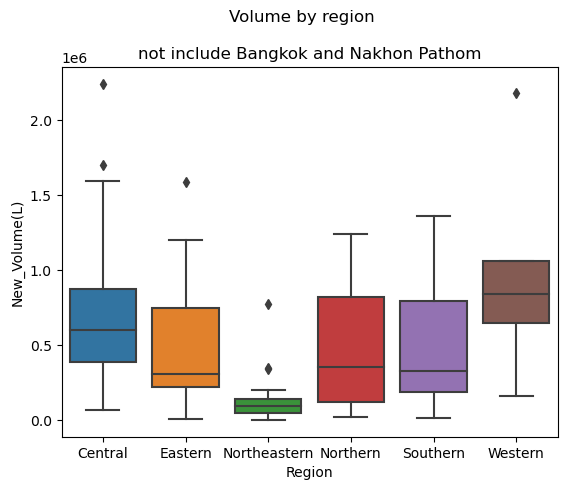

In [31]:
region_sales = churn_by_region.groupby(['Region', 'Province']).agg({'New_Volume(L)': 'sum'}).reset_index()

# distribution of total qty every province in each region not include bangkok
sns.boxplot(data=region_sales.drop(index=[1, 5]), x='Region', y='New_Volume(L)')
plt.suptitle('Volume by region', y=1)
plt.title('not include Bangkok and Nakhon Pathom')

In [32]:
region_sales[ region_sales['New_Volume(L)'] > 6500000 ]

Region       Province  New_Volume(L)
1  Central        Bangkok        7394073
5  Central  Nakhon Pathom        6855471

extract monthly

In [33]:
churn_by_region.rename(columns={'quarter': 'month'}, inplace=True)
churn_by_region['month'] = churn_by_region['Invoicedate'].dt.month

volume_by_group = churn_by_region.groupby(['GroupId', 'Province', 'Material Name', 'month'])\
                                    .agg({'New_Volume(L)': 'sum'}).reset_index()
# volume_by_group['volume_diff'] = volume_by_group.groupby(['GroupId', 'Province', 'Material Name'])['New_Volume(L)']\
#                                                 .transform('diff').fillna(0)

volume_by_group.head()

GroupId Province                             Material Name  \
0  ERW_A1DS2023040002  Bangkok  M SUP AIO PROTECTION TBS 5W-30 12X1L/CAR   
1  ERW_A1DS2023040002  Bangkok  M SUP AIO PROTECTION TBS 5W-30 12X1L/CAR   
2  ERW_A1DS2023040002  Bangkok   M SUP AIO PROTECTION TBS 5W-30 4X7L/CAR   
3  ERW_A1DS2023040002  Bangkok   M SUP AIO PROTECTION TBS 5W-30 4X7L/CAR   
4  ERW_A1DS2023040002  Bangkok   M SUP AIO PROTECTION TBS 5W-30 4X7L/CAR   

   month  New_Volume(L)  
0      7           2328  
1     11           5532  
2      5          12544  
3      9           8120  
4     11           5040

In [44]:
# Shift the columns to get next month and volume
volume_by_group['next_month'] = volume_by_group.groupby(['GroupId', 'Province', 'Material Name'])['month'].shift(-1)
volume_by_group['next_volume'] = volume_by_group.groupby(['GroupId', 'Province', 'Material Name'])['New_Volume(L)'].shift(-1)

monthly_sales = volume_by_group.dropna().rename(columns={'New_Volume(L)': 'cur_volume'}).reset_index(drop=True)
monthly_sales['volume_diff'] = monthly_sales['next_volume'] - monthly_sales['cur_volume']
monthly_sales['month_diff'] = monthly_sales['next_month'] - monthly_sales['month']

print(monthly_sales.shape)
monthly_sales.rename(columns={'month': 'cur_month'}).head()

(3811, 9)


GroupId    Province                             Material Name  \
0  ERW_A1DS2023040002     Bangkok  M SUP AIO PROTECTION TBS 5W-30 12X1L/CAR   
1  ERW_A1DS2023040002     Bangkok   M SUP AIO PROTECTION TBS 5W-30 4X7L/CAR   
2  ERW_A1DS2023040002     Bangkok   M SUP AIO PROTECTION TBS 5W-30 4X7L/CAR   
3  ERW_A1DS2023040002     Bangkok     M SUP AIO Protection 5W-30 4x4+1L/CAR   
4  ERW_A1DS2023040005  Udon Thani  M DEL LEGEND CH-4 15W-40 H.D. CTN4X7L:TH   

   cur_month  cur_volume  next_month  next_volume  volume_diff  month_diff  
0          7        2328        11.0       5532.0       3204.0         4.0  
1          5       12544         9.0       8120.0      -4424.0         4.0  
2          9        8120        11.0       5040.0      -3080.0         2.0  
3          5        7160        10.0       4580.0      -2580.0         5.0  
4         11       16436        12.0       5908.0     -10528.0         1.0

Churn classification

In [35]:
monthly_sales['Churn'] = ' '
monthly_sales.loc[monthly_sales.volume_diff == 0, 'Churn'] = 'No'
monthly_sales.loc[monthly_sales.volume_diff < 0, 'Churn'] = 'Yes'

In [40]:
avg_volume_province = volume_by_group.groupby(['Province', 'month'])\
                                        .agg({'New_Volume(L)': 'mean'})\
                                        .rename(columns={'New_Volume(L)': 'province_mean_vol'})
                                        
churn_prep = pd.merge(monthly_sales, avg_volume_province, on=['Province', 'month'], how='left')

for ind in churn_prep.index:
    diff = churn_prep.loc[ind, 'volume_diff']
    if diff > 0:
        if (churn_prep.loc[ind, 'next_month'] - churn_prep.loc[ind, 'month']) >= 3\
            and churn_prep.loc[ind, 'cur_volume'] < churn_prep.loc[ind, 'province_mean_vol']:
                churn_prep.loc[ind, 'Churn'] = 'Yes'
        else:
            churn_prep.loc[ind, 'Churn'] = 'No'
            
pd.option_context.copy_on_write = True
volume_by_group['next_month'] = volume_by_group['next_month'].astype('int')
volume_by_group['next_volume'] = volume_by_group['next_volume'].astype('int')
        
churn_prep.sample(5)

GroupId      Province                          Material Name  \
338   ERW_AMBP2020110039       Bangkok        MOBIL ATF 220 SYN TECH 4X5L/CAR   
333   ERW_AMBP2020110039       Bangkok        MOBIL ATF 220 SYN TECH 4X5L/CAR   
1855  ERW_BM2U2020110077  Samut Sakhon  M SUPER E. P. TBS 15W-40 CTN 12X1L:TH   
2583  ERW_C08P2020090046  Nakhon Sawan   MOBIL SUPER 2000 TBS 10W-30 4X7L/CAR   
3085  ERW_C08P2020090170    Chiang Rai  M DEL MODERN 15W-40 S DEFENS 20L/PAIL   

      month  cur_volume  next_month  next_volume  volume_diff Churn  \
338       7        3780           8         7540       3760.0    No   
333       1        9460           2         5500      -3960.0   Yes   
1855      4        9768           6         1200      -8568.0   Yes   
2583      3        7644           5         6636      -1008.0   Yes   
3085      3        3420           5         9800       6380.0    No   

      province_mean_vol  
338         5704.601852  
333         6332.586538  
1855        5958.705882  
2583        5506.000000  
3085        5909.625000

In [37]:
# churn_prep.drop(columns='province_mean_vol').to_csv('Machine_learning/churn.csv', index=False)